In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

path="/home/souranil/Source_Code/Final_Year_Project/Project Dataset/"

2025-05-16 15:38:32.333020: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-16 15:38:32.537978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747390112.643730    3962 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747390112.679231    3962 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747390112.862815    3962 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Dataset Preperation

In [2]:
print("The total number of datapoints: ", len(os.listdir(path+"Face images")))

image_metadata=pd.DataFrame(columns=['height', 'width', 'class'])
for i in os.listdir(path+"Face images"):
    image_metadata.loc[len(image_metadata)]= [cv2.imread(path+"Face images/"+i).shape[0],cv2.imread(path+"Face images/"+i).shape[1], 1]

print(image_metadata)
image_metadata.to_csv(path+"faces.csv")

The total number of datapoints:  2204
      height  width  class
0        350    500      1
1       1241   1000      1
2        957   1300      1
3       4000   2667      1
4        867   1300      1
...      ...    ...    ...
2199     236    236      1
2200     318    236      1
2201     157    236      1
2202     354    236      1
2203     236    236      1

[2204 rows x 3 columns]


In [4]:
print("The total number of datapoints: ", len(os.listdir(path+"Non Face images")))

image_metadata=pd.DataFrame(columns=['height', 'width', 'class'])
for i in os.listdir(path+"Non Face images"):
    image_metadata.loc[len(image_metadata)]= [cv2.imread(path+"Non Face images/"+i).shape[0],cv2.imread(path+"Non Face images/"+i).shape[1], 0]

print(image_metadata)
image_metadata.to_csv(path+"non faces.csv")

The total number of datapoints:  2256
      height  width  class
0        640    640      0
1        640    640      0
2        640    640      0
3        640    640      0
4        640    640      0
...      ...    ...    ...
2251     640    640      0
2252     640    640      0
2253     640    640      0
2254     640    640      0
2255     640    640      0

[2256 rows x 3 columns]


Resizing the images to a common size 

In [5]:
data=pd.read_csv(path+"faces.csv")
height_mean1=data['height'].mean()
width_mean1=data['width'].mean()

print("Height: ",height_mean1,"Width: ", width_mean1)
data=pd.read_csv(path+"non faces.csv")
height_mean2=data['height'].mean()
width_mean2=data['width'].mean()

print("Height: ",height_mean2,"Width: ", width_mean2)

height_mean=(height_mean2+height_mean1)/2
width_mean=(width_mean2+width_mean1)/2
print("Height: ",height_mean,"Width: ", width_mean)

Height:  874.8611615245009 Width:  956.5453720508167
Height:  1120.2056737588653 Width:  1322.163120567376
Height:  997.5334176416831 Width:  1139.3542463090962


In [2]:
size=150
for i in os.listdir(path+"Face images/"):
    image_data=cv2.imread(path+"Face images/"+i)
    image_data=cv2.resize(image_data, dsize=(size, size))
    cv2.imwrite(filename=path+"Face images/"+i, img=image_data)
    
for i in os.listdir(path+"Non Face images/"):
    image_data=cv2.imread(path+"Non Face images/"+i)
    image_data=cv2.resize(image_data, dsize=(size, size))
    cv2.imwrite(filename=path+"Non Face images/"+i, img=image_data)

Extracting data from the reshaped images

In [3]:
path="/home/souranil/Source_Code/Final_Year_Project/Project Dataset/"
X=[]
image_file_names=os.listdir(path+"Face images/")
temp=None
for i in os.listdir(path+"Face images/"):
    temp=np.divide(cv2.imread(path+"Face images/"+i),255, dtype=np.float64)
    X.append(temp.flatten())

image_file_names=os.listdir(path+"Non Face images/")
for i in os.listdir(path+"Non Face images/"):
    temp=np.divide(cv2.imread(path+"Non Face images/"+i), 255, dtype=np.float64)
    X.append(temp.flatten())

X=np.array(X)
np.savetxt(path+"dataset1.csv", X, delimiter=',', fmt='%f')
y=[0.00]*len(os.listdir(path+"Face images/"))+[1.00]*len(os.listdir(path+"Non Face images/"))
y=np.array(y, dtype=np.float64)
np.savetxt(path+"labels1.csv", y, delimiter=',', fmt='%f')

#Load the Dataset

In [39]:
path="/home/souranil/Source_Code/Final_Year_Project/Project Dataset/"
X=np.loadtxt(path+'dataset1.csv', delimiter=',')
y=np.loadtxt(path+'labels1.csv', delimiter=',')
X=X.reshape([len(y), 150, 150, 3])

print(len(X), len(y))

447 447


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=58, train_size=0.40)
print(len(X_train), len(X_test))

X=None
y=None

TypeError: Expected sequence or array-like, got <class 'NoneType'>

Building the Model with Tensorflow / Keras

In [9]:
gpu=tf.config.list_physical_devices('GPU')
print(gpu[0])
model=Sequential()

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [10]:
model.add(Conv2D(70, (4,4), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D((3,3), strides=2))

model.add(Conv2D(50, (3,3), activation='relu',))
model.add(MaxPool2D((3,3)))

model.add(Conv2D(30, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

/home/souranil/Source_Code/Final_Year_Project/Codebase/project/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747330882.461536    8301 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2616 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [11]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [36]:
model.fit(X_train, y_train, epochs=4, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/4
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9374 - loss: 0.2045

2025-05-16 09:46:18.773187: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.10 = (f32[8,50,71,71]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,70,73,73]{3,2,1,0} %bitcast.5404, f32[50,70,3,3]{3,2,1,0} %bitcast.4815, f32[50]{0} %bitcast.5464), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1_2/convolution" source_file="/home/souranil/Source_Code/Final_Year_Project/Codebase/project/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-16 09:46:18.976275: I external/local_xla/xla/service/gpu/autotuning/conv_algori

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.9360 - loss: 0.2027

2025-05-16 09:46:22.348473: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.10 = (f32[9,50,71,71]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,70,73,73]{3,2,1,0} %bitcast.445, f32[50,70,3,3]{3,2,1,0} %bitcast.452, f32[50]{0} %bitcast.454), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1_2/convolution" source_file="/home/souranil/Source_Code/Final_Year_Project/Codebase/project/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-16 09:46:22.566588: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.9355 - loss: 0.2019 - val_accuracy: 0.9628 - val_loss: 0.1631
Epoch 2/4
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9364 - loss: 0.1829 - val_accuracy: 0.9665 - val_loss: 0.1815
Epoch 3/4
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9615 - loss: 0.0934 - val_accuracy: 0.9703 - val_loss: 0.1800
Epoch 4/4
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 0.0225 - val_accuracy: 0.9554 - val_loss: 0.1993


In [40]:
model.evaluate(X, y)

2025-05-16 09:46:52.114325: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.10 = (f32[32,50,71,71]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,70,73,73]{3,2,1,0} %bitcast.445, f32[50,70,3,3]{3,2,1,0} %bitcast.452, f32[50]{0} %bitcast.454), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1_2/convolution" source_file="/home/souranil/Source_Code/Final_Year_Project/Codebase/project/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-16 09:46:52.631886: I external/local_xla/xla/service/gpu/autotuning/conv_algorit

13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9738 - loss: 0.1614

2025-05-16 09:46:53.796701: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.10 = (f32[31,50,71,71]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,70,73,73]{3,2,1,0} %bitcast.445, f32[50,70,3,3]{3,2,1,0} %bitcast.452, f32[50]{0} %bitcast.454), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1_2/convolution" source_file="/home/souranil/Source_Code/Final_Year_Project/Codebase/project/lib64/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-16 09:46:54.308616: I external/local_xla/xla/service/gpu/autotuning/conv_algorit

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9737 - loss: 0.1565


[0.12479868531227112, 0.9731543660163879]

In [9]:
print(model.input_shape)

(None, 150, 150, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1


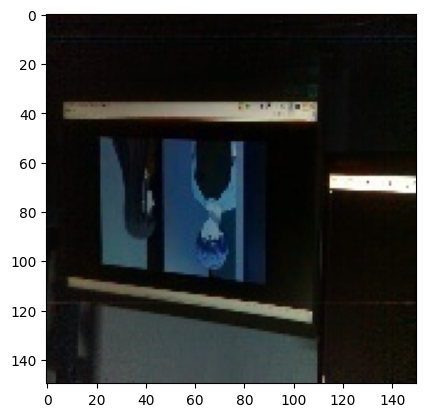

In [65]:
index=random.randint(0, len(X)-1)
plt.imshow(X[index])

# print(input.shape)
y_pred=model.predict(X[[index]])
print(int(np.round(y_pred[0])[0]))


In [ ]:
index=random.randint(0, len(os.listdir(path+)))

In [68]:
model.save("/home/souranil/Source_Code/Final_Year_Project/Codebase/Model/temp.keras") ## Model is saved as the temp model with the new architecture and the new dataset

In [2]:
model=load_model("/home/souranil/Source_Code/Final_Year_Project/Codebase/Model/model1.keras")

I0000 00:00:1747390139.945086    3962 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2616 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Testing the saved Model

In [9]:
model=load_model("/home/souranil/Source_Code/Final_Year_Project/Codebase/Model/model1.keras") ## model1 being the initially trained model

In [67]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)

lite_model=converter.convert()
with open("/home/souranil/Source_Code/Final_Year_Project/Codebase/Android_application/model1.tflite", "wb") as f:
    f.write(lite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqb77k2m4/assets


INFO:tensorflow:Assets written to: /tmp/tmpqb77k2m4/assets


Saved artifact at '/tmp/tmpqb77k2m4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140102626490128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627051280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627051856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627052432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627051088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627053392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627051472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627054352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627053776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627055120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140102627050320

W0000 00:00:1747371045.980106    8404 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1747371045.980147    8404 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-16 10:20:45.980742: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpqb77k2m4
2025-05-16 10:20:45.981605: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-16 10:20:45.981617: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpqb77k2m4
I0000 00:00:1747371045.990057    8404 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-05-16 10:20:45.991535: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-16 10:20:46.059493: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpqb77k2m4
2025-05-16 10:20:46.074492: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

##Using cv2 harcascade classifier

There aren't any human nearby


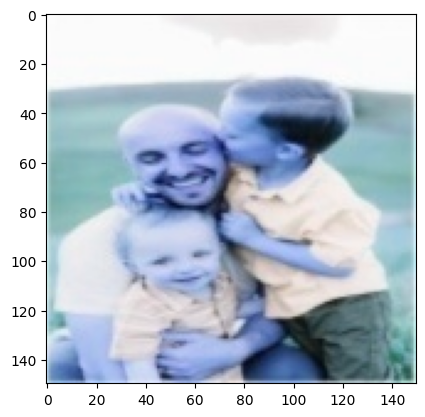

In [ ]:
import cv2.data


classifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

image=cv2.imread("/home/souranil/Source_Code/Final_Year_Project/Project Dataset/All images/00003471.jpg")
plt.imshow(image)
# image=cv2.imread("/home/souranil/Source_Code/Final_Year_Project/Project Dataset/Non Face images/")
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces=classifier.detectMultiScale(image, minNeighbors=8,minSize=(15,15))

if len(faces)>0:
    print("There are humans nearby")
else:
    print("There aren't any human nearby")

In [ ]:
detector=cv2.FaceDetectorYN.create(args)